# Quantum Full Adder

To skip the code explanation and move directly to the results, [click here](#research).

## Basic requirements

A full adder requires input bits A, B and a carry in bit $c_{in}$ as well as two output bits for the result OUT and the carry out $c_{out}$. After measuring, we will map OUT and $c_{out}$ to two classical bits $c_{0}$ and $c_{1}$

In [50]:
import numpy as np
from qiskit import *

circuit = QuantumCircuit(4, 2)

## Initialize some values

This will induce the following states:
<br>A=0
<br>B=1
<br>$C_{in}$=1

In [51]:
circuit.x(1);
circuit.x(2);

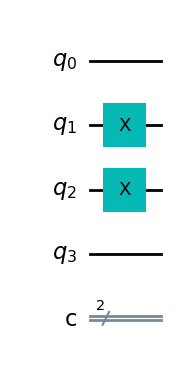

In [52]:
circuit.draw(output='mpl')

Note:
<br>$q_0$ = A 
<br>$q_1$ = B
<br>$q_2$ = $c_{in}$ and OUT
<br>$q_3$ = $c_{out}$

In our circuit, we will make use of the CNOT gate and the Toffoli gate (CCNOT):

## Gates

$$CNOT=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$$
<br>CNOT flips the second input bit, if the first input bit is set to 1.

$$CCNOT=\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \end{bmatrix}$$
<br>CCNOT flips the third input bit, if the first two input bits are both set to 1.

## Full Adder Logical Formulae

We can compute the outputs in the following way:
<br>OUT = (A XOR B) XOR $C_{in}$
<br>$C_{out}$ = A\*B + A\*$C_{in}$ + B\*$C_{in}$ = A\*B + (A+B)\*$C_{in}$ which we can rewrite as A\*B + (A XOR B)\*$C_{in}$ (to fit better in our circuit)

## Full adder using quantum gates

### 1\) A\*B -> $C_{out}$  

In [53]:
circuit.toffoli(0, 1, 3);

### 2\) A XOR B -> B (CNOT(A, B))

In [54]:
circuit.cx(0, 1);

### 3\) (A XOR B) \* $C_{in}$ -> $C_{out}$

In [55]:
circuit.toffoli(1, 2, 3);

With 1) and 3) we have now set $C_{out}$ to A\*B + (A XOR B)\*$C_{in}$

### 4\) (A XOR B) XOR $C_{in}$ -> OUT

Note: $C_{in}$ and OUT share the same wire.

In [56]:
circuit.cx(1, 2);

### 5\) Return wire B to its original input state

We will achieve this by performing step 1 again, effectively doing:
<br>A XOR (A XOR B) = B

In [57]:
circuit.cx(0, 1);

### Measure the results

In [58]:
circuit.measure([2,3], [1,0]);

## The complete circuit

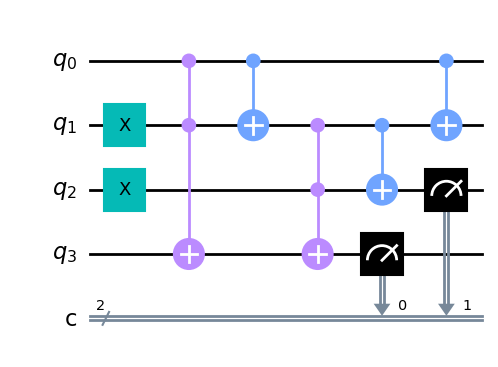

In [59]:
%matplotlib inline
circuit.draw(output='mpl')

## Simulate the code

In [60]:
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1000).result()

counts = result.get_counts(compiled_circuit)
print(counts)

{'01': 1000}


All 1000 computations resulted in 01, meaning OUT = 0 and $C_{out}$=1

# Research: addition of quantum states <a id='research'></a>

In the example above, we used only standard basis vectors ( |0> and |1> ) which behaved just like classical bits would. 
<br>We will now look at more interesting states.

## Performing Hadamard operations to the inputs

### 1) A in superposition and B, C = 0

In [61]:
circuit = QuantumCircuit(4, 2)

# init states
circuit.h(0)

# gates
circuit.toffoli(0, 1, 3);
circuit.cx(0, 1);
circuit.toffoli(1, 2, 3);
circuit.cx(1, 2);
circuit.cx(0, 1);

circuit.measure([2,3], [1,0]);

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

counts = result.get_counts(compiled_circuit)
print("{output : number of shots} = ",counts)

{output : number of shots} =  {'10': 485, '00': 515}


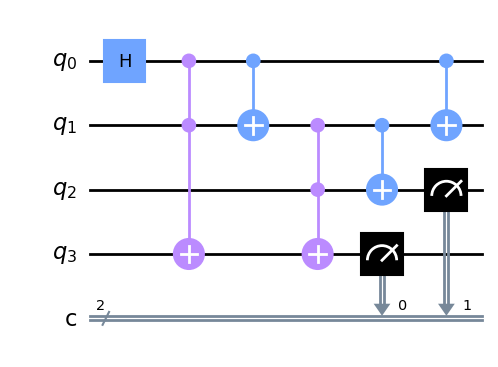

In [62]:
%matplotlib inline
circuit.draw(output='mpl')

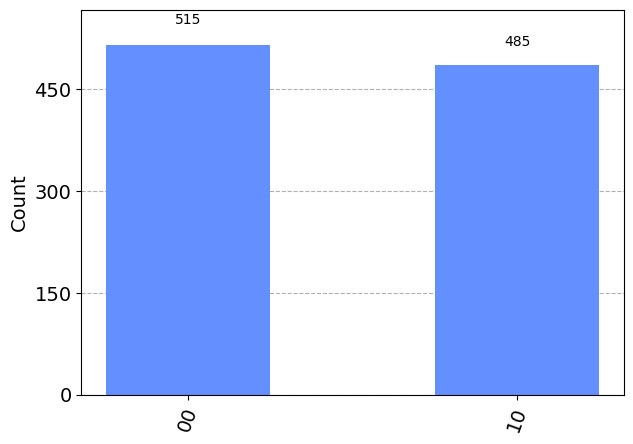

In [63]:
plot_histogram(counts)

### 2) A and B entangled, C in superposition

In [64]:
circuit = QuantumCircuit(4, 2)

# init states
circuit.h(0)
circuit.cx(0,1)

circuit.h(2)

# gates
circuit.toffoli(0, 1, 3);
circuit.cx(0, 1);
circuit.toffoli(1, 2, 3);
circuit.cx(1, 2);
circuit.cx(0, 1);

circuit.measure([2,3], [1,0]);

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

counts = result.get_counts(compiled_circuit)
print("{output : number of shots} = ",counts)

{output : number of shots} =  {'00': 266, '10': 259, '11': 243, '01': 232}


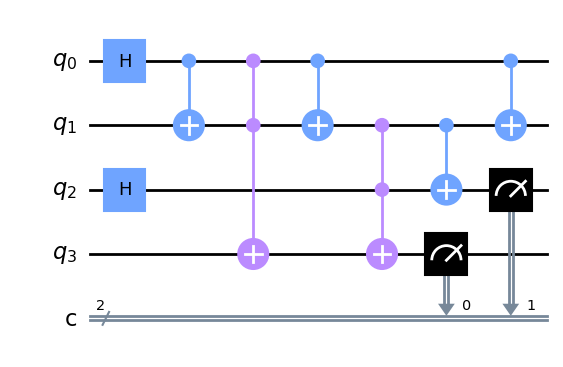

In [65]:
%matplotlib inline
circuit.draw(output='mpl')

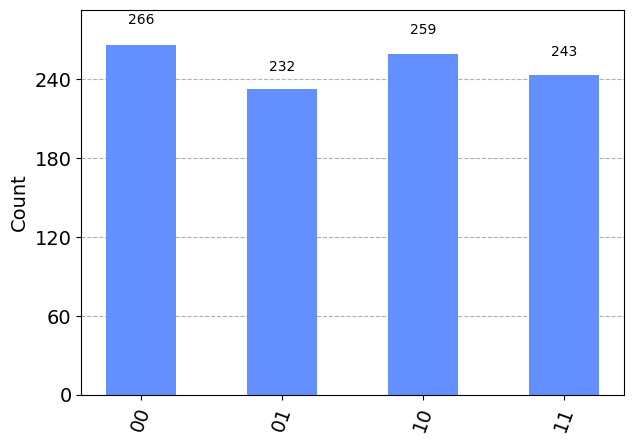

In [66]:
plot_histogram(counts)

Each possible outcome has a 25% chance!

## Inputs that are not standard basis vectors

In [67]:
circuit = QuantumCircuit(4, 2)

# init states
circuit.initialize([np.sqrt(3/4), np.sqrt(1/4)], 0)
circuit.initialize([np.sqrt(1/2), np.sqrt(1/2)], 1)
circuit.reset(2)
circuit.reset(3)

# gates
circuit.toffoli(0, 1, 3);
circuit.cx(0, 1);
circuit.toffoli(1, 2, 3);
circuit.cx(1, 2);
circuit.cx(0, 1);

circuit.measure([2,3], [1,0]);

simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()

counts = result.get_counts(compiled_circuit)
print("{output : number of shots} = ",counts)

{output : number of shots} =  {'01': 114, '10': 513, '00': 373}


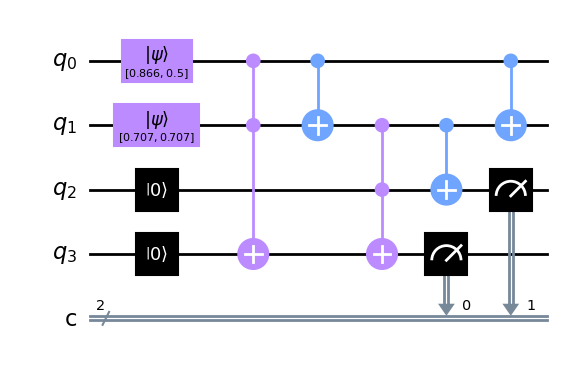

In [68]:
%matplotlib inline
circuit.draw(output='mpl')

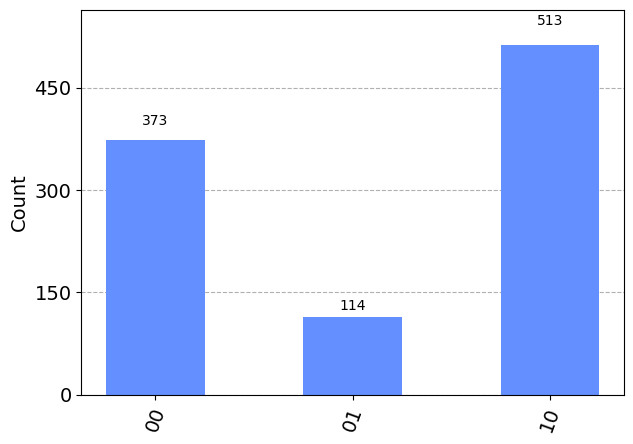

In [69]:
plot_histogram(counts)

Why do we get this result? The inputs are
$$ q_0 = \begin{bmatrix} \sqrt{\frac{3}{4}} \\ \sqrt{\frac{1}{4}} \end{bmatrix} $$ 
and 
$$ q_1 = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} $$
If we name this state $π_0$, we can calculate it using
$$ π_0 = \begin{bmatrix} \sqrt{\frac{3}{4}} \\ \sqrt{\frac{1}{4}} \end{bmatrix} \otimes \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = \begin{bmatrix} \sqrt{\frac{3}{4}} \\ \sqrt{\frac{1}{4}} \end{bmatrix} \otimes \frac{1}{\sqrt{2}} * \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} * \begin{bmatrix} \sqrt{\frac{3}{4}} \\ \sqrt{\frac{3}{4}} \\ \sqrt{\frac{1}{4}} \\ \sqrt{\frac{1}{4}} \end{bmatrix}$$
The inputs 00 and 01 have a chance of $$ (\frac{1}{\sqrt{2}} * \sqrt{\frac{3}{4}})^2 = 0.375$$
while 10 and 11 have a chance of $$ (\frac{1}{\sqrt{2}} * \sqrt{\frac{1}{4}})^2 = 0.125$$
Btw, we can also see that our state vector is correct: 0.375 + 0.375 + 0.125 + 0.125 = 1
<br>As a reminder, the full adder has the following truth table: (neglecting $c_{in}$ as it is always 0 in our example)

| $q_0q_1$ | output |
| --- | --- |
| 00 | 00 |
| 01 | 10 |
| 10 | 10 |
| 11 | 01 |

This gives us following probabilities for the output:

| output | probability |
| --- | --- |
| 00 | 0.375 |
| 01 | 0.125 |
| 10 | 0.375 + 0.125 = 0.5 |
| 11 | 0 |

which agrees with the data shown in the plot above.

# To be continued...